In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy.stats import chisquare, binom

df = pd.read_csv('/kaggle/input/old-dataset/oldus2024.csv')

In [2]:
df.head()

,Tweet ID,Username,Text,Date,Retweets,Likes,Stance,weight,date_clean
0,1.815175e+18,Ashley Hayek,if you were concerned about the weaponization ...,Sun Jul 21 23:59:45 +0000 2024,7.0,13.0,Anti Democrat,4.060078,45859.999826
1,1.815175e+18,Kathy Hochul,as democrats our mission remains the same doin...,Sun Jul 21 23:59:53 +0000 2024,389.0,1468.0,Pro Democrat,8.560053,45859.999919
2,1.815175e+18,·ñá. ·îï·ëïOTT ·îïI·ëï·ó©·ñáIO 2.0,biden called a lid at elevencute facezeroam th...,Sun Jul 21 23:59:45 +0000 2024,1.0,2.0,Neutral,2.395472,45859.999826
3,1.815175e+18,Robert Sherman,bidens schedule week of july twentytwotwentyei...,Sun Jul 21 23:59:51 +0000 2024,0.0,3.0,Neutral,2.395472,45859.999896
4,1.815175e+18,the eagles ruined the 3-peat,do you think biden knows he dropped out of the...,Sun Jul 21 23:59:46 +0000 2024,1.0,3.0,Neutral,2.619474,45859.999838


## Testing if the Data Follows a Binomial Distribution

### Objective:
To verify whether the number of Pro-Democrat tweets in each batch follows a Binomial Distribution.

---

## Hypothesis Formulation:

- ### Null Hypothesis (H₀):
> The number of Pro-Democrat tweets in a batch follows a Binomial Distribution with parameters \( n \) (batch size) and \( \theta_D \) (probability of a tweet being Pro-Democrat).

- ### Alternative Hypothesis (H₁):
> The data does not follow a Binomial Distribution.

---

## Parameter Estimation:

The probability parameter \( \theta_D \) is estimated using the Maximum Likelihood Estimator (MLE):

$$
\theta_D = \frac{\text{Total Pro-Democrat Tweets}}{\text{Total Tweets across all batches}}
$$

This value represents the empirical probability of a tweet being Pro-Democrat.

---

## Expected Frequencies Calculation:

Using the Binomial probability mass function (PMF):

$$
P(X = k) = \binom{n}{k} \theta_D^k (1 - \theta_D)^{n-k}
$$

Where:
- \( n \) = Number of trials (batch size)
- \( k \) = Number of Pro-Democrat tweets
- \( \theta_D \) = Estimated probability

Expected frequency for each \( k \) is given by:

$$
E_k = P(X = k) \times \text{Total Number of Batches}
$$


## Why Chi-Square Goodness of Fit Test?

There are multiple types of Chi-Square tests used in statistics:

| Test | Purpose | Formula | Data Type |
|------|---------|---------|-----------|
| Chi-Square Test for Population Variance | Tests if sample variance equals population variance | \( \chi^2 = \frac{(n-1)S^2}{\sigma^2} \) | Continuous |
| Chi-Square Goodness of Fit Test | Tests if observed data fits a theoretical distribution | \( \chi^2 = \sum \frac{(O_k - E_k)^2}{E_k} \) | Discrete Counts |

---

### In our case:
- We want to check if the number of Pro-Democrat tweets per batch follows a Binomial Distribution.
- Data is in the form of counts (discrete).
- We know the expected frequencies from Binomial PMF.
- No need for population variance or sample variance here.

Thus, the appropriate test is:

### Chi-Square Goodness of Fit Test:
$$
\chi^2 = \sum \frac{(O_k - E_k)^2}{E_k}
$$
Where:
- $O_k$ = Observed frequency for category \(k\)
- $E_k$ = Expected frequency for category \(k\)


## Interpretation:

- The p-value from the Chi-Square test indicates the probability of observing such a deviation between observed and expected counts under the assumption of the Binomial model.

- If $p \geq 0.05$ → Fail to Reject $H₀$  
(Data is consistent with Binomial Distribution)

- If $p < 0.05 $ → Reject $H₀$  
(Data does not follow Binomial Distribution)

---

Estimated θ = 0.1549
Chi-square Statistic = 1.6371
P-value = 0.9772


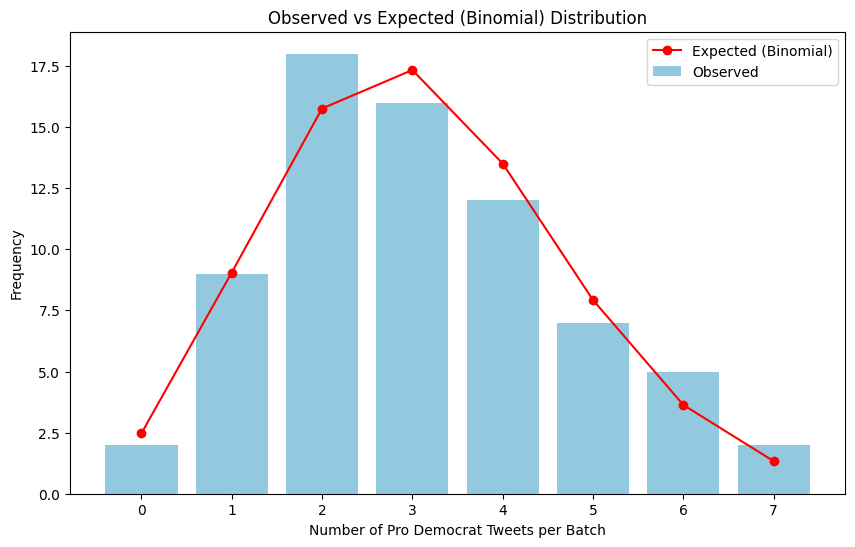

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, chisquare

df_dem = df[df['Stance'].str.strip().str.lower() == 'pro democrat']

batch_size = 20  
total_tweets = len(df)
num_batches = total_tweets // batch_size

batches = [df.iloc[i*batch_size : (i+1)*batch_size] for i in range(num_batches)]

xD = [sum(batch['Stance'].str.strip().str.lower() == 'pro democrat') for batch in batches]

theta_hat = sum(xD) / (num_batches * batch_size)
print(f'Estimated θ = {theta_hat:.4f}')

observed_counts = pd.Series(xD).value_counts().sort_index()

expected_counts = [num_batches * binom.pmf(k, batch_size, theta_hat) for k in observed_counts.index]

expected_counts = np.array(expected_counts)
expected_counts *= observed_counts.sum() / expected_counts.sum()

# Chi-square test 
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f'Chi-square Statistic = {chi2_stat:.4f}')
print(f'P-value = {p_value:.4f}')

# Plot observed vs expected
plt.figure(figsize=(10,6))
sns.barplot(x=observed_counts.index, y=observed_counts.values, color='skyblue', label='Observed')
plt.plot(observed_counts.index, expected_counts, color='red', marker='o', linestyle='-', label='Expected (Binomial)')
plt.xlabel('Number of Pro Democrat Tweets per Batch')
plt.ylabel('Frequency')
plt.title('Observed vs Expected (Binomial) Distribution')
plt.legend()
plt.show()

In [4]:
df.head()

,Tweet ID,Username,Text,Date,Retweets,Likes,Stance,weight,date_clean
0,1.815175e+18,Ashley Hayek,if you were concerned about the weaponization ...,Sun Jul 21 23:59:45 +0000 2024,7.0,13.0,Anti Democrat,4.060078,45859.999826
1,1.815175e+18,Kathy Hochul,as democrats our mission remains the same doin...,Sun Jul 21 23:59:53 +0000 2024,389.0,1468.0,Pro Democrat,8.560053,45859.999919
2,1.815175e+18,·ñá. ·îï·ëïOTT ·îïI·ëï·ó©·ñáIO 2.0,biden called a lid at elevencute facezeroam th...,Sun Jul 21 23:59:45 +0000 2024,1.0,2.0,Neutral,2.395472,45859.999826
3,1.815175e+18,Robert Sherman,bidens schedule week of july twentytwotwentyei...,Sun Jul 21 23:59:51 +0000 2024,0.0,3.0,Neutral,2.395472,45859.999896
4,1.815175e+18,the eagles ruined the 3-peat,do you think biden knows he dropped out of the...,Sun Jul 21 23:59:46 +0000 2024,1.0,3.0,Neutral,2.619474,45859.999838


In [5]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Tweet ID', 'Username', 'Text', 'Date', 'Retweets', 'Likes', 'Stance', 'weight', 'date_clean']
['Tweet ID', 'Username', 'Text', 'Date', 'Retweets', 'Likes', 'Stance', 'weight', 'date_clean']


Expected Support for Democrats: 0.4779587672016935
Expected Support for Republicans: 0.5220412327983065


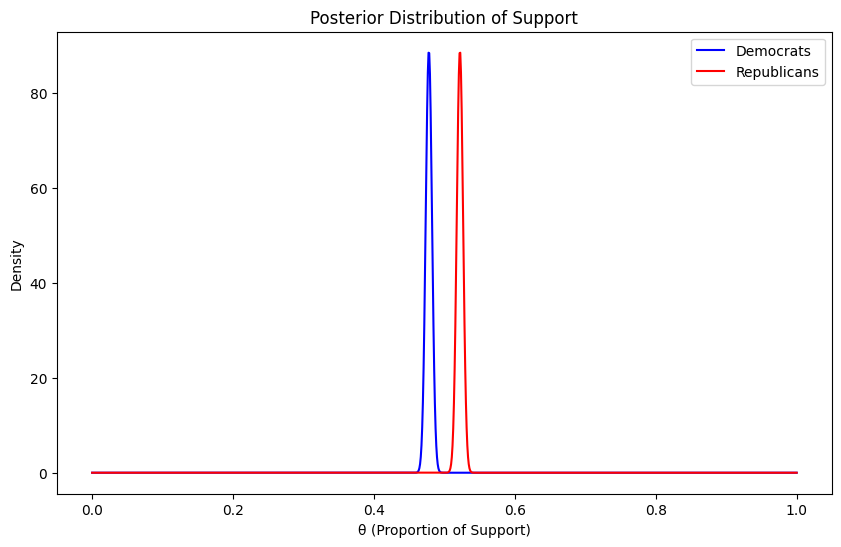

In [6]:
x_D = df[df['Stance'] == 'Pro Democrat']['weight'].sum()
x_R = df[df['Stance'] == 'Anti Democrat']['weight'].sum()

n = x_D + x_R

alpha_D = 5130
beta_D = 4870
alpha_R = 4870
beta_R = 5130

posterior_D = beta(alpha_D + x_D, beta_D + x_R)
posterior_R = beta(alpha_R + x_R, beta_R + x_D)

E_theta_D = (alpha_D + x_D) / (alpha_D + beta_D + n)
E_theta_R = (alpha_R + x_R) / (alpha_R + beta_R + n)

print("Expected Support for Democrats:", E_theta_D)
print("Expected Support for Republicans:", E_theta_R)

x = np.linspace(0,1,1000)

plt.figure(figsize=(10,6))
plt.plot(x, posterior_D.pdf(x), label='Democrats', color='blue')
plt.plot(x, posterior_R.pdf(x), label='Republicans', color='red')
plt.title('Posterior Distribution of Support')
plt.xlabel('θ (Proportion of Support)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [7]:
if E_theta_D > E_theta_R:
    print("Prediction: Democrats will win!")
else:
    print("Prediction: Republicans will win!")


Prediction: Republicans will win!
